# Supplementary Fig. 14e: Increment of GC content per round of monomer expansion.

SINE-tRNA internal sequence extension likely caused by unequal crossing over yields the formation of a microsatellite repeat of 205-206 bases in size (monomeric unit). 


On each round of monomer extension, via non-homologous recombination, a T>G substitution occurs at the breakout point. Such substitution leads to a local increase in GC content. The graph represents the expected changes of GC content of the whole SINE-tRNAV per monomer extension with or without the T>G repair process.


SINE/tRNA-V intact GC content: 0.473282442748


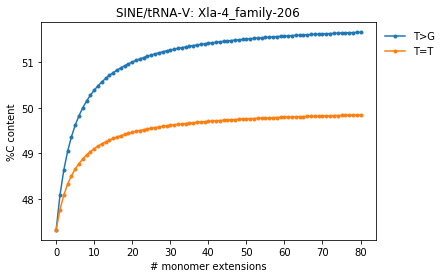

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

def GC_content(dna):
    dna=dna.upper()
    GC_cont =  (dna.count('G') + dna.count('C'))/ float(dna.count('G') + dna.count('C')+dna.count('T') + dna.count('A'))
    return(GC_cont)

SINE_example_dict=dict()
SINE_example_dict["SINE/tRNA-V: Xla-4_family-206"] = 'AAAGTTGCCTAGTGGGTGAGCACTGGTCCTAGGTTCGATTCCAGCCAGGGCANTATCTGCAAGGAGTTTGTATGTTCTCCCTGTGTCTGCGTGGGTTTCCTCCGGGTACTCCGGTTTCCTCCCACAAAAACATACAGGCAGGTTAATTGGCTCCTGATAAAATTGACCNTAGTGTGTGTGAATGTGATAGGGACCTTAGATTGTAAGCTCCACTGGGGCAGGGACTGATGTGAATGATGTATAATCTCTGTAAAACTGTGTCAA'

consensus_No_G ='gaatgtgatagggaccttagattgtaagctccactggggcagggactgatgt'.upper()
consensus_w_G = 'gaatgtgatagggaccttagattgtaagctccactggggcagggactgatgG'.upper()

print 'SINE/tRNA-V intact GC content:', GC_content(SINE_example_dict["SINE/tRNA-V: Xla-4_family-206"])
extendable = SINE_example_dict["SINE/tRNA-V: Xla-4_family-206"]

pct_GC_gain_per_generation_wG = [GC_content(extendable)]
for i in range(0,80):
    extendable = ''.join((extendable ,consensus_w_G))
    pct_GC_gain_per_generation_wG.append(GC_content(extendable)) 
    

extendable = SINE_example_dict["SINE/tRNA-V: Xla-4_family-206"]
pct_GC_gain_per_generation_nG = [GC_content(extendable)]
for i in range(0,80):
    extendable = ''.join((extendable ,consensus_No_G))
    pct_GC_gain_per_generation_nG.append(GC_content(extendable)) 

plt.figure()
plt.title(SINE_example_dict.keys()[0])
plt.plot(100*np.array(pct_GC_gain_per_generation_wG), label ='T>G', marker=".")
plt.plot(100*np.array(pct_GC_gain_per_generation_nG), label ='T=T', marker=".")
plt.legend(bbox_to_anchor=(1,1), loc=2, frameon=False)
plt.ylabel('%C content')
plt.xlabel("# monomer extensions")
plt.show()

In [3]:
GC_content_extenssion = pd.DataFrame([pct_GC_gain_per_generation_wG,pct_GC_gain_per_generation_nG]).T
GC_content_extenssion = GC_content_extenssion.rename(columns={0:'T>G',1:'T=T'})
GC_content_extenssion.to_csv(os.path.join('SourceData','Supplementary_Fig.14','Supplementary_Fig.14e.tsv'), sep='\t')

In [4]:
print 'Original SINE/tRNA-V consensus length:', len(SINE_example_dict["SINE/tRNA-V: Xla-4_family-206"])
print 'Original SINE/tRNA-V GC content:', 100*np.round(GC_content(SINE_example_dict["SINE/tRNA-V: Xla-4_family-206"]),3),'%'

Original SINE/tRNA-V consensus length: 264
Original SINE/tRNA-V GC content: 47.3 %
